# Parkinson Dataset with replicated acoustic features Data Set 
(http://archive.ics.uci.edu/ml/datasets/Parkinson+Dataset+with+replicated+acoustic+features+ ) contains acoustic features extracted from 3 voice recording replications of the sustained /a/phonation for each one of the 80 subjects (Some of them with Parkinson's Disease, i.e., status=1). 
## Please find the data as Parkinson.csv file. (Hint: columns ‘ID’ and ‘Recording’ can not be considered as the features.)

# a. Given a dataset to analyze, before designing supervised learning model or unsupervised model, we need to understand the structure and statistics of the data, i.e., distribution of class labels, distribution of each feature, etc. 

In [36]:
import pandas as pd
Parkinson = pd.read_csv("/Users/Shared/Files From d.localized/Spring2023/AI/programming assignment 1/Parkinson.csv",
                                 index_col = False, header = 0) 



In [37]:
Parkinson.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [38]:
Parkinson.dtypes

ID             object
Recording       int64
Status          int64
Gender          int64
Jitter_rel    float64
Jitter_abs    float64
Jitter_RAP    float64
Jitter_PPQ    float64
Shim_loc      float64
Shim_dB       float64
Shim_APQ3     float64
Shim_APQ5     float64
Shi_APQ11     float64
HNR05         float64
HNR15         float64
HNR25         float64
HNR35         float64
HNR38         float64
RPDE          float64
DFA           float64
PPE           float64
GNE           float64
MFCC0         float64
MFCC1         float64
MFCC2         float64
MFCC3         float64
MFCC4         float64
MFCC5         float64
MFCC6         float64
MFCC7         float64
MFCC8         float64
MFCC9         float64
MFCC10        float64
MFCC11        float64
MFCC12        float64
Delta0        float64
Delta1        float64
Delta2        float64
Delta3        float64
Delta4        float64
Delta5        float64
Delta6        float64
Delta7        float64
Delta8        float64
Delta9        float64
Delta10   

In [39]:
n_case = len(Parkinson[Parkinson["Status"]==1])
n_control = len(Parkinson[Parkinson["Status"]==0])

print("case",n_case)
print("control",n_control)

case 120
control 120


<function matplotlib.pyplot.show(close=None, block=None)>

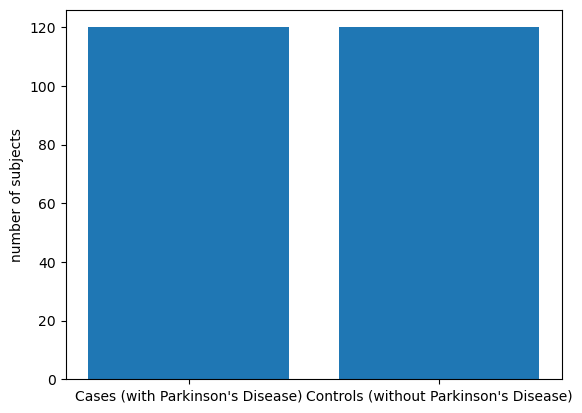

In [40]:
import matplotlib.pyplot as plt
plt.bar(["Cases (with Parkinson's Disease)","Controls (without Parkinson's Disease)"],[n_case,n_control])
plt.ylabel("number of subjects")
plt.show

In [52]:
# missing distribution # null-> missing rate
missing_dis = Parkinson.isnull().sum()/len(Parkinson)
print(missing_dis)

ID            0.0
Recording     0.0
Status        0.0
Gender        0.0
Jitter_rel    0.0
Jitter_abs    0.0
Jitter_RAP    0.0
Jitter_PPQ    0.0
Shim_loc      0.0
Shim_dB       0.0
Shim_APQ3     0.0
Shim_APQ5     0.0
Shi_APQ11     0.0
HNR05         0.0
HNR15         0.0
HNR25         0.0
HNR35         0.0
HNR38         0.0
RPDE          0.0
DFA           0.0
PPE           0.0
GNE           0.0
MFCC0         0.0
MFCC1         0.0
MFCC2         0.0
MFCC3         0.0
MFCC4         0.0
MFCC5         0.0
MFCC6         0.0
MFCC7         0.0
MFCC8         0.0
MFCC9         0.0
MFCC10        0.0
MFCC11        0.0
MFCC12        0.0
Delta0        0.0
Delta1        0.0
Delta2        0.0
Delta3        0.0
Delta4        0.0
Delta5        0.0
Delta6        0.0
Delta7        0.0
Delta8        0.0
Delta9        0.0
Delta10       0.0
Delta11       0.0
Delta12       0.0
dtype: float64


In [53]:
feature_distribution = Parkinson.drop(columns = ['ID','Recording']).describe() 
print(feature_distribution)

           Status      Gender  Jitter_rel  Jitter_abs  Jitter_RAP  Jitter_PPQ  \
count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
mean     0.500000    0.400000    0.583987    0.000044    0.003172    0.003532   
std      0.501045    0.490922    0.535769    0.000045    0.003373    0.004449   
min      0.000000    0.000000    0.148010    0.000007    0.000678    0.001036   
25%      0.000000    0.000000    0.298260    0.000019    0.001551    0.001867   
50%      0.500000    0.000000    0.481455    0.000035    0.002337    0.002870   
75%      1.000000    1.000000    0.681685    0.000056    0.003678    0.003991   
max      1.000000    1.000000    6.838200    0.000550    0.043843    0.065199   

         Shim_loc     Shim_dB   Shim_APQ3   Shim_APQ5  ...      Delta3  \
count  240.000000  240.000000  240.000000  240.000000  ...  240.000000   
mean     0.038428    0.336832    0.021499    0.023468  ...    1.343238   
std      0.023213    0.205905    0.013787    0.0

# b. Considering each record as an individual sample, please train a decision tree classifier (max_depth = 3) to predict the status of each sample. 

In [78]:
from sklearn.model_selection import train_test_split 
y = Parkinson["Status"].values
X = Parkinson.drop(columns=["ID","Recording","Status"]).values
feature_used = Parkinson.drop(columns=["ID","Recording",'Status']).columns.tolist()
print("feature_used",feature_used)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

feature_used ['Gender', 'Jitter_rel', 'Jitter_abs', 'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3', 'Shim_APQ5', 'Shi_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38', 'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4', 'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11', 'Delta12']
(216, 45) (24, 45) (216,) (24,)


In [79]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean") 
imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train),dtype = np.float32)
X_test = np.array(imputer.transform(X_test),dtype = np.float32)

In [80]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced', random_state = 0)
# train the tree
tree.fit(X_train, y_train)
# use the trained classifier to predict in test set
y_pred = tree.predict(X_test)
print(y_pred)
# Evaluate the prediciton performance
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

[0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.91      0.77      0.83        13

    accuracy                           0.83        24
   macro avg       0.84      0.84      0.83        24
weighted avg       0.84      0.83      0.83        24



Precision: It measures the accuracy of the positive predictions. In this context, for class 0, the precision is 0.77, meaning that out of all instances predicted as class 0, 77% are actually class 0. For class 1, the precision is 0.91, indicating that 91% of instances predicted as class 1 are indeed class 1.

Recall: It measures the ability of the model to find all the positive instances. For class 0, the recall is 0.91, implying that the model correctly identifies 91% of all actual class 0 instances. For class 1, the recall is 0.77, meaning that the model captures 77% of all actual class 1 instances.

F1-score: It is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score indicates both high precision and high recall. For both classes 0 and 1, the F1-score is 0.83, suggesting a good balance between precision and recall.

Support: It represents the number of occurrences of each class in the dataset. For class 0, there are 11 instances, and for class 1, there are 13 instances.

Accuracy: It is the proportion of correctly classified instances among all instances. In this case, the overall accuracy is 0.83, indicating that the model correctly classifies 83% of all instances.

Macro average: It computes the average of the metrics without considering class imbalance. For precision, recall, and F1-score, the macro average is 0.84, indicating good performance across classes.

Weighted average: It computes the weighted average of the metrics, taking into account the support (number of true instances) for each class. The weighted average for precision, recall, and F1-score is 0.84, similar to the macro average in this case, as there is no significant class imbalance.

Overall, the model seems to perform reasonably well, with balanced precision and recall, and a good F1-score. However, further analysis, such as examining the confusion matrix or considering domain-specific requirements, may be necessary for a more comprehensive evaluation.

In [81]:
from sklearn.metrics import roc_auc_score,roc_curve 
y_proba = tree.predict_proba(X_test)[:,1]
#Create true and false positive rates
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test,y_proba)

predict_proba(X_test): This method predicts class probabilities for the samples in X_test. It returns an array where each row corresponds to a sample in X_test, and each column represents the probability of belonging to a particular class.
[:, 1]: This indexing operation selects the probabilities of the positive class (class 1) for all samples. 
The [:, 1] part selects all rows (:) and the second column (1) of the predicted probabilities array, which corresponds to the probabilities of the positive class.
So, y_proba will be an array containing the predicted probabilities of the positive class for each sample in the test set.

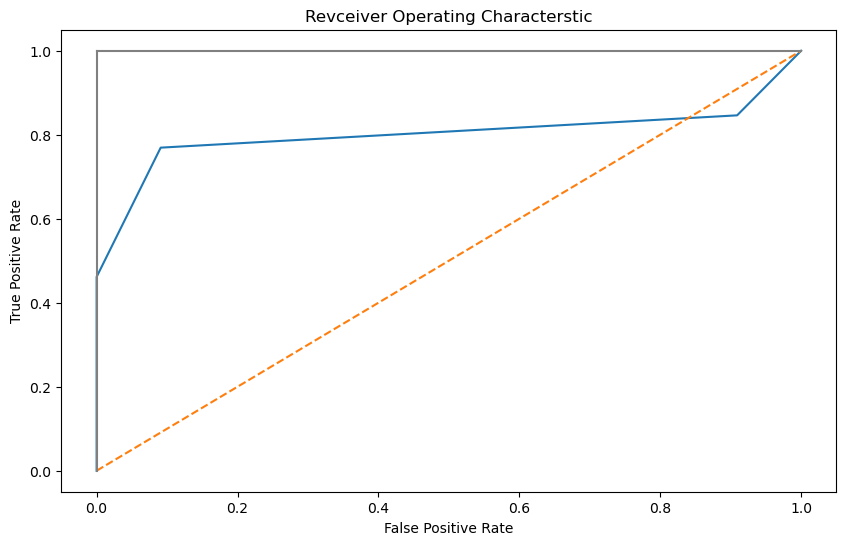

In [82]:
#Plot ROC Curve
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_dt, tpr_dt) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [83]:
#Calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba)
print(auc_lr)

0.8006993006993007


The diagonal line: Represents the ROC curve of a random classifier. Points on this line suggest that the model has no discrimination capability; it's essentially guessing.

Points above the diagonal line: Indicate that the model is performing better than random.

The top-left corner (0, 1): Represents perfect classification, where the model achieves 100% true positive rate (no false negatives) and 0% false positive rate (no false positives). This is the ideal point.

The bottom-right corner (1, 0): Represents the worst classification scenario, where the model predicts all negative instances as positive and all positive instances as negative.

Area Under the Curve (AUC): AUC represents the area under the ROC curve. It provides a single scalar value summarizing the model's performance across all possible thresholds. A higher AUC indicates better model performance, with a maximum value of 1 for a perfect classifier.

In [84]:
# visualization decision tree
import graphviz # Run following code in command line: conda install python-graphviz 
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, out_file = None,
                           feature_names = feature_used, 
                           filled = True, rounded = True, 
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree",cleanup = True) # generate PDF file in your program folder

'decision_tree.pdf'

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


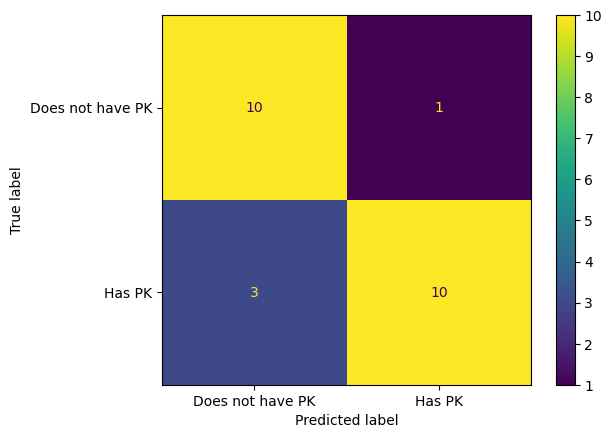

In [85]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(tree.fit(X_train, y_train), X_test, y_test, display_labels=["Does not have PK", "Has PK"])

Of the 11 people who did not have PK are correctly classify (10/11); Of the 13 people who did not have PK are correctly classify (10/13)

In [86]:
conda install python-graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [87]:
print(tree.get_depth())

3


# c. Grid Search can help us to tune the model parameters to find the optimal solution. Tune the decision tree classifier to improve the predictive performance

In [89]:
# class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]¶

estimator: This is the estimator object that implements the scikit-learn estimator interface. It is the model or algorithm that you want to optimize using grid search.

param_grid: A dictionary or a list of dictionaries with parameters names as keys and lists of parameter settings to try as values. This specifies the grid of hyperparameters that will be searched over.
ex. max_depth, KNN

scoring: A string, callable, list, tuple or dictionary that defines how the performance of the model will be evaluated during cross-validation. If a single score is used, it can be a string representing a scoring metric or a callable that returns a single value. If multiple scores are used, it can be a list/tuple of strings representing different scoring metrics, a callable returning a dictionary of metric scores, or a dictionary with metric names as keys and callables as values.
ex. accuracy, roc_auc

n_jobs: An integer specifying the number of parallel jobs to run during grid search. By default, it is set to None (1 job), but it can also be set to -1 (use all available processors).

refit: A boolean, string or callable indicating whether to refit an estimator using the best-found parameters on the whole dataset after grid search is complete. If set to True, the estimator will be refitted with the best parameters and made available at the best_estimator_ attribute.

cv: The cross-validation strategy to use during grid search. It can be an integer specifying the number of folds in a (Stratified) KFold, a cross-validation splitter object, or an iterable yielding (train, test) splits as arrays of indices.

verbose: An integer controlling the verbosity level during grid search. Higher values enable more detailed messages about computation time, scores, and parameter indexes.

pre_dispatch: An integer or string controlling the number of jobs that get dispatched during parallel execution. Reducing this number can be useful to avoid memory consumption issues. It can be set to an exact number of total jobs, a formula expression as a function of n_jobs, or None (immediate creation and spawning of all jobs).

error_score: A string or numeric value specifying how to handle errors that occur during estimator fitting. If set to ‘raise’, the error is raised. If a numeric value is given, a warning is raised but the grid search will proceed.

return_train_score: A boolean indicating whether to include training scores in the cv_results_ attribute. Computing training scores can provide insights on overfitting/underfitting trade-off, but it can be computationally expensive and is not necessary for parameter selection.


In [90]:
# train model using Grid Search with cross-validation
# the goal is to identify the best hyper-parameters of the model 
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(criterion = 'gini', class_weight = 'balanced', random_state = 0)
grid = GridSearchCV(tree,
                    param_grid={"max_depth":range(2,11)},
scoring = "accuracy",
cv = 5, return_train_score = True
                   )
grid.fit(X_train, y_train)
# obtain grid results
scores = pd.DataFrame(grid.cv_results_)

In [91]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002007,0.000335,0.000228,4.997394e-05,2,{'max_depth': 2},0.772727,0.744186,0.674419,0.627907,...,0.698732,0.052421,9,0.837209,0.826590,0.855491,0.786127,0.809249,0.822933,0.023745
1,0.001932,0.000128,0.000144,1.252857e-05,3,{'max_depth': 3},0.840909,0.767442,0.720930,0.744186,...,0.763531,0.041391,6,0.877907,0.895954,0.890173,0.890173,0.890173,0.888876,0.005924
2,0.002066,0.000059,0.000129,4.708390e-06,4,{'max_depth': 4},0.818182,0.790698,0.627907,0.720930,...,0.749683,0.068866,8,0.906977,0.936416,0.924855,0.924855,0.965318,0.931684,0.019274
3,0.002281,0.000156,0.000130,9.702201e-07,5,{'max_depth': 5},0.818182,0.697674,0.651163,0.860465,...,0.763636,0.077569,5,0.906977,0.953757,0.930636,0.971098,0.994220,0.951338,0.030436
4,0.002539,0.000328,0.000155,4.188666e-05,6,{'max_depth': 6},0.750000,0.767442,0.627907,0.837209,...,0.754651,0.069806,7,0.936047,0.965318,0.953757,0.988439,1.000000,0.968712,0.023110
5,0.002550,0.000294,0.000143,2.535249e-05,7,{'max_depth': 7},0.840909,0.674419,0.697674,0.837209,...,0.768182,0.069748,4,0.976744,0.971098,0.982659,0.988439,1.000000,0.983788,0.009964
6,0.002754,0.000333,0.000158,2.946892e-05,8,{'max_depth': 8},0.818182,0.767442,0.697674,0.837209,...,0.782241,0.048488,3,0.994186,1.000000,1.000000,1.000000,1.000000,0.998837,0.002326
7,0.002729,0.000379,0.000152,2.504162e-05,9,{'max_depth': 9},0.795455,0.790698,0.697674,0.837209,...,0.782347,0.045805,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.002633,0.000336,0.000136,4.128430e-06,10,{'max_depth': 10},0.795455,0.790698,0.697674,0.837209,...,0.782347,0.045805,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


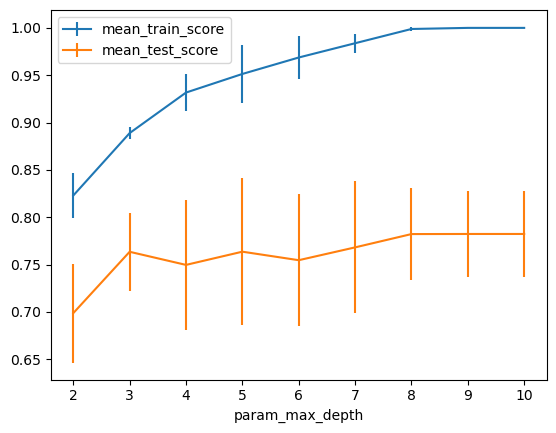

In [92]:
# visulization of grid search
scores.plot(x = "param_max_depth",y = "mean_train_score",yerr = "std_train_score") 
scores.plot(x = "param_max_depth",y = "mean_test_score",yerr = "std_test_score",ax = plt.gca()) 
# ax = plt.gca() , keep plot at the same axis
plt.legend()
plt.show()

In [93]:
grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)

In [94]:
# use the best model to predict
y_pred_grid = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_grid))
# generate PDF file in your program folder
# The dot_data variable typically contains the graph description in the DOT language, which is a plain text graph description language. 
# It's commonly used in Graphviz, a popular graph visualization software.

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.91      0.77      0.83        13

    accuracy                           0.83        24
   macro avg       0.84      0.84      0.83        24
weighted avg       0.84      0.83      0.83        24



In [95]:
# visualization decision tree (best model)
import graphviz 
dot_data = export_graphviz(grid.best_estimator_,
out_file = None,                
            feature_names = feature_used, 
                           filled = True,
rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_best_model_1",cleanup = True) 

'decision_tree_best_model_1.pdf'

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


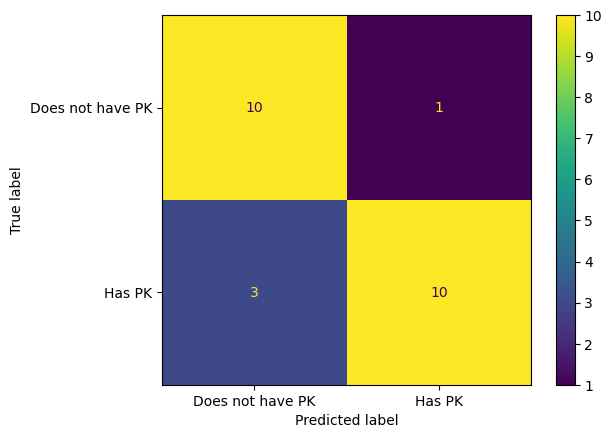

In [96]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(grid.fit(X_train, y_train), X_test, y_test, display_labels=["Does not have PK", "Has PK"])

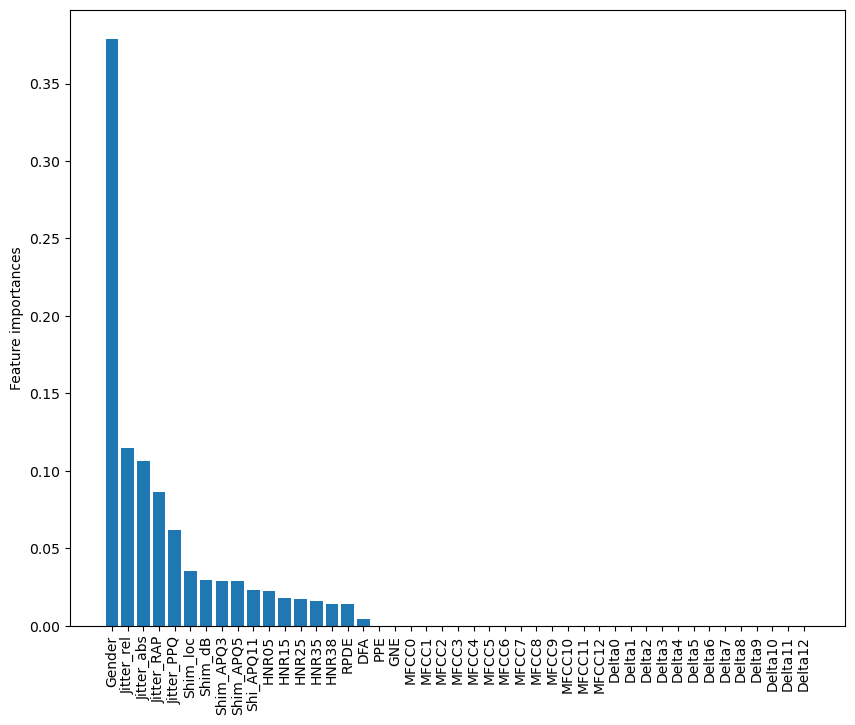

In [97]:
# feature importance
importances = grid.best_estimator_.feature_importances_ 

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))

plt.ylabel("Feature importances")

plt.bar(range(len(feature_used)), importances[indices], align="center") 

plt.xticks(range(len(feature_used)), feature_used, rotation=90)

plt.show()

# ILPD.csv file
-  provides the age, gender, total Bilirubin, direct Bilirubin, total proteins, albumin, A/G ratio, SGPT, SGOT and Alkphos of patients. 
## Train a KNN classifier and a Logistic Regression classifier to predict class label of the patient. 

# a. KNN classifier

In [99]:
# load data set into DataFrame
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/Shared/Files From d.localized/Spring2023/AI/programming assignment 1/ILPD.csv', header = 0)

In [100]:
# To explore the number of cases (death) and controls (alive finally)
n_case = len(data[data['Class'] == 2]) 
n_control = len(data[data['Class'] == 1])
print('Number of cases: ', n_case)
print('Number of controls : ', n_control)

print('Proportion of case: %.2f%%' % (100 * n_case / (n_control + n_case)))

Number of cases:  167
Number of controls :  416
Proportion of case: 28.64%


Text(0, 0.5, 'number of subjects')

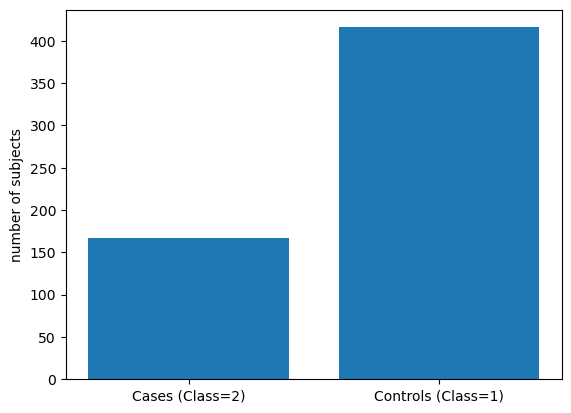

In [101]:
# visualize case-control distribution
import matplotlib.pyplot as plt
plt.bar(['Cases (Class=2)','Controls (Class=1)'], [n_case, n_control])
plt.ylabel('number of subjects')

In [102]:
print(data.isnull().sum() / len(data))

Age                 0.000000
Gender              0.000000
total Bilirubin     0.000000
direct Bilirubin    0.000000
total proteins      0.001715
albumin             0.005146
A/G ratio           0.000000
SGPT                0.000000
SGOT                0.000000
Alkphos             0.006861
Class               0.000000
dtype: float64


In [103]:
data.loc[data['Gender'] == 'Male', 'Gender'] = 1
data.loc[data['Gender'] == 'Female', 'Gender'] = 0
data.drop(columns = ['Class']).describe()

,Age,total Bilirubin,direct Bilirubin,total proteins,albumin,A/G ratio,SGPT,SGOT,Alkphos
count,583.000000,583.000000,583.000000,582.000000,580.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.422680,80.898276,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,243.118615,183.063760,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.250000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [104]:
from sklearn.model_selection import train_test_split
y = data['Class'].values
X = data.drop(columns = ['Class']).values
feature_used = data.drop(columns = ['Class']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(437, 10) (146, 10) (437,) (146,)


In [105]:
# impute the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train), dtype=np.float32) 
X_test = np.array(imputer.transform(X_test), dtype=np.float32)

Note

For the non-tree-based machine learning models, such as KNN, logistic regression, and linear regression, data scaling is usually requried to eliminate the effects of magnitude.

In [106]:
 # Data scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() # z-score based scaling

In [107]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [108]:
X_train_scaled

array([[-2.2724998 , -1.6832508 , -0.36378908, ...,  0.9000858 ,
         0.30893022, -0.47380003],
       [ 1.0783157 ,  0.5940885 , -0.39459834, ...,  1.5271325 ,
         0.06235034, -1.0922339 ],
       [ 1.2644721 , -1.6832508 , -0.39459834, ...,  0.2730392 ,
        -0.30751935, -0.78301704],
       ...,
       [ 1.5126806 , -1.6832508 , -0.3791937 , ...,  1.7062886 ,
         2.158279  ,  1.3815012 ],
       [ 0.95421135,  0.5940885 , -0.1481242 , ...,  0.09388269,
         0.43222004,  0.4538507 ],
       [-1.1555613 ,  0.5940885 ,  6.0907526 , ...,  0.9000858 ,
        -0.6773893 , -1.4014509 ]], dtype=float32)

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [110]:
# Train KNN classifier with Grid Search
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV 
knn =KNeighborsClassifier()

In [111]:
grid = GridSearchCV(knn,
param_grid={'n_neighbors':[5, 10, 15, 20, 25, 30, 35, 40]},
scoring='roc_auc', 
                    cv=5, 
                    return_train_score=True)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40]},
             return_train_score=True, scoring='roc_auc')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


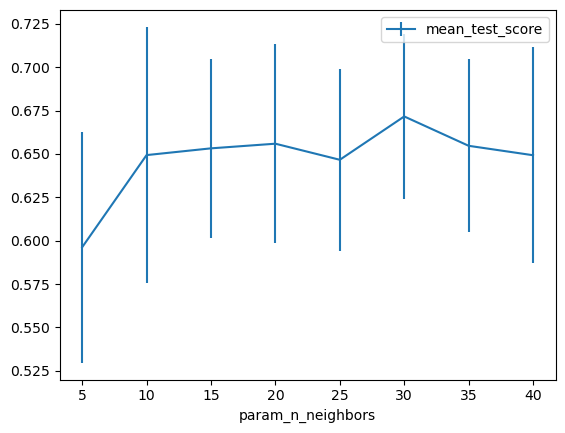

In [817]:
# To visualize tuning process
scores = pd.DataFrame(grid.cv_results_) 
scores.plot(x='param_n_neighbors', y='mean_test_score',
yerr='std_test_score', ax=plt.gca()) 
plt.legend()
plt.show()

By examining the relationship between param_n_neighbors and mean_test_score, you can identify the value of param_n_neighbors that leads to the best performance of the KNN model on the validation set. Typically, you would choose the value of param_n_neighbors that corresponds to the highest mean_test_score as the optimal hyperparameter setting for your KNN model.

In [112]:
# best model parameters
print(grid.best_params_)

{'n_neighbors': 30}


In [113]:
# make prediction on test set
y_pred = grid.best_estimator_.predict(X_test_scaled) # get predicted labels 
print(y_pred)
y_proba = grid.best_estimator_.predict_proba(X_test_scaled)[:,1] # get probabilities that belong to each class 
print(classification_report(y_test, y_pred))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1]
              precision    recall  f1-score   support

           1       0.69      0.95      0.80       100
           2       0.38      0.07      0.11        46

    accuracy                           0.67       146
   macro avg       0.53      0.51      0.45       146
weighted avg       0.59      0.67      0.58       146



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# b. Logistic Regression Classifier

In [161]:
# load data set into DataFrame
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/Shared/Files From d.localized/Spring2023/AI/programming assignment 1/ILPD.csv', header = 0)

In [162]:
for index, row in data.iterrows():
    if row['Class'] == 1:  # Check if the class label is 1
        data.loc[index, 'Class'] = 0  # Replace class label 1 with 0
    elif row['Class'] == 2:  # Check if the class label is 2
        data.loc[index, 'Class'] = 1  # Replace class label 2 with 1

In [163]:
# To explore the number of cases (death) and controls (alive finally)
        
n_case = len(data[data['Class'] == 1]) 
n_control = len(data[data['Class'] == 0])

print('Number of cases: ', n_case)
print('Number of controls : ', n_control)

print('Proportion of case: %.2f%%' % (100 * n_case / (n_control + n_case)))

Number of cases:  167
Number of controls :  416
Proportion of case: 28.64%


Text(0, 0.5, 'number of subjects')

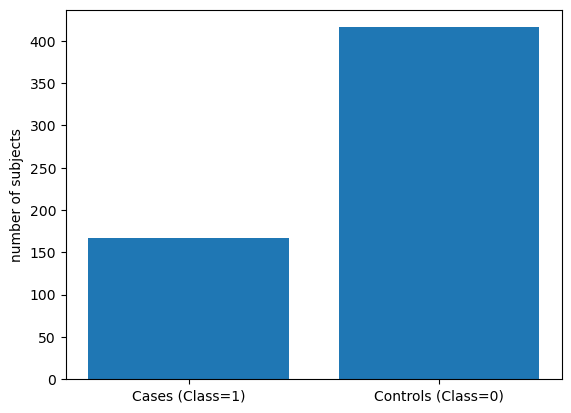

In [165]:
# visualize case-control distribution
import matplotlib.pyplot as plt
plt.bar(['Cases (Class=1)','Controls (Class=0)'], [n_case, n_control])
plt.ylabel('number of subjects')

In [166]:
# To assess missing values
print(data.isnull().sum() / len(data))

Age                 0.000000
Gender              0.000000
total Bilirubin     0.000000
direct Bilirubin    0.000000
total proteins      0.001715
albumin             0.005146
A/G ratio           0.000000
SGPT                0.000000
SGOT                0.000000
Alkphos             0.006861
Class               0.000000
dtype: float64


In [167]:
data.loc[data['Gender'] == 'Male', 'Gender'] = 1
data.loc[data['Gender'] == 'Female', 'Gender'] = 0
data.drop(columns = ['Class']).describe()

,Age,total Bilirubin,direct Bilirubin,total proteins,albumin,A/G ratio,SGPT,SGOT,Alkphos
count,583.000000,583.000000,583.000000,582.000000,580.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.422680,80.898276,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,243.118615,183.063760,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.250000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [168]:
from sklearn.model_selection import train_test_split
y = data['Class'].values
X = data.drop(columns = ['Class']).values
feature_used = data.drop(columns = ['Class']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.10, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(524, 10) (59, 10) (524,) (59,)


In [169]:
# impute the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train), dtype=np.float32)
X_test = np.array(imputer.transform(X_test), dtype=np.float32)

In [170]:
# Data scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [171]:
# build logistic regression classifer
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

In [172]:
# Setting parameters for GridSearchCV
params = {
'penalty':['l2'], 'C':[0.01,0.1,1,10,100, 200, 300], 
    'class_weight':['balanced',None]
}
#penalty: This parameter specifies the norm used in the penalization (regularization) term of the logistic regression algorithm.
# 'l2' indicates the L2 regularization, which penalizes the squared magnitude of coefficients. 
# It's commonly used to prevent overfitting.
# C: This parameter represents the inverse of regularization strength. Larger values of C indicate less regularization.
# The specified values [0.01, 0.1, 1, 10, 100, 200, 300] represent different levels of regularization strength that will be tested during the grid search.

In [173]:
#  train model with Grid Search
grid = GridSearchCV(lr, param_grid=params, scoring='roc_auc', cv=10)
grid.fit(X_train_scaled,y_train)
# Printing best parameters choosen through GridSearchCV
grid.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [174]:
# make prediction on the test set
y_pred = grid.best_estimator_.predict(X_test_scaled)
y_proba = grid.best_estimator_.predict_proba(X_test_scaled)[:,1]

In [175]:
# output the precision, recall, and f1-score
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        45
           1       0.60      0.21      0.32        14

    accuracy                           0.78        59
   macro avg       0.70      0.58      0.59        59
weighted avg       0.75      0.78      0.74        59



In [178]:
from sklearn.metrics import roc_auc_score,roc_curve 

#Create true and false positive rates

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,y_proba)
# Assuming y_true and y_pred are your true labels and predicted probabilities
roc_auc = roc_auc_score(y_test, y_proba)

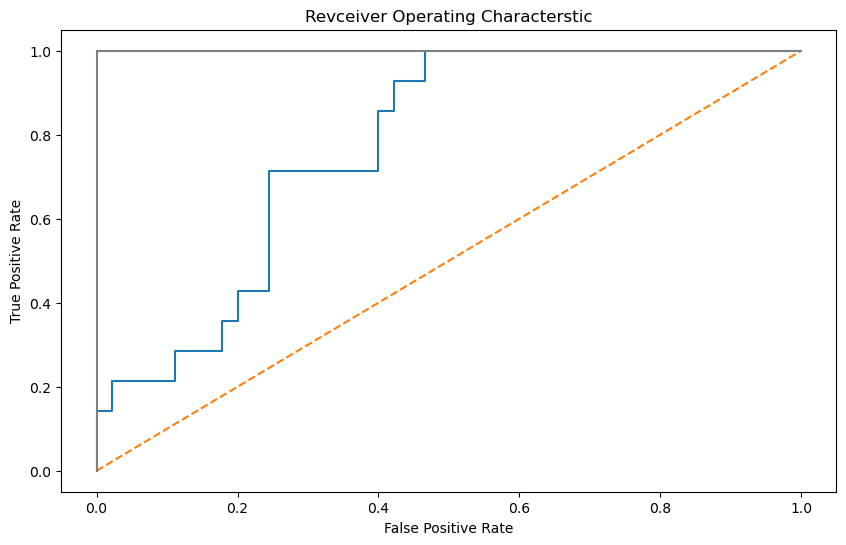

In [179]:
#Plot ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [180]:
#Calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba) 
print(auc_lr)

0.7730158730158729
